<a href="https://colab.research.google.com/github/Saloni0512/PyTorch-practice-/blob/main/PyTorch_model_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine learning practice

In [ ]:

import pandas as pd
import torch
import numpy as np



In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
torch.cuda.device_count()

0

In [ ]:
a_tensor = torch.tensor([10,10,30,40,10,60])
a_tensor
a_tensor.shape

torch.Size([6])

## pytorch play

In [ ]:
random_tensor_a = torch.rand(7,7)
random_tensor_a

tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904, 0.6009, 0.2566],
        [0.7936, 0.9408, 0.1332, 0.9346, 0.5936, 0.8694, 0.5677],
        [0.7411, 0.4294, 0.8854, 0.5739, 0.2666, 0.6274, 0.2696],
        [0.4414, 0.2969, 0.8317, 0.1053, 0.2695, 0.3588, 0.1994],
        [0.5472, 0.0062, 0.9516, 0.0753, 0.8860, 0.5832, 0.3376],
        [0.8090, 0.5779, 0.9040, 0.5547, 0.3423, 0.6343, 0.3644],
        [0.7104, 0.9464, 0.7890, 0.2814, 0.7886, 0.5895, 0.7539]])

In [ ]:
random_tensor_b = torch.rand(1,7)
random_tensor_b

tensor([[0.1952, 0.0050, 0.3068, 0.1165, 0.9103, 0.6440, 0.7071]])

In [ ]:
new_tensor = torch.mm(random_tensor_a,random_tensor_b.T)
new_tensor

tensor([[1.3299],
        [1.8111],
        [1.3228],
        [0.9725],
        [1.8285],
        [1.4806],
        [2.0489]])

In [ ]:
RANDOM_SEED = 0
torch.manual_seed(RANDOM_SEED)
random_tensor_c = torch.rand(7,7)
random_tensor_c

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])

In [ ]:
RANDOM_SEED = 1234
torch.manual_seed(RANDOM_SEED)
tensor_d = torch.rand(2,3)
tensor_e = torch.rand(2,3)

tensor_d_on_gpu = tensor_d.to(device)
tensor_e_on_gpu = tensor_e.to(device)

tensor_d_on_gpu, tensor_e_on_gpu

(tensor([[0.0290, 0.4019, 0.2598],
         [0.3666, 0.0583, 0.7006]]),
 tensor([[0.0518, 0.4681, 0.6738],
         [0.3315, 0.7837, 0.5631]]))

In [ ]:
tensor_f = torch.mm(tensor_d_on_gpu,tensor_e_on_gpu.T)
tensor_f

tensor([[0.3647, 0.4709],
        [0.5184, 0.5617]])

In [ ]:
tensor_f.max(), tensor_f.min()

(tensor(0.5617), tensor(0.3647))

In [ ]:
new_tensor1 = torch.rand(3,4)
new_tensor2 = torch.rand(4,3)
mul_tensor = new_tensor1 @ new_tensor2
print(f'mul_tensor is {mul_tensor}')
print(f'mul_tensor shape is {mul_tensor.shape}')

mul_tensor is tensor([[1.5447, 1.6681, 1.1516],
        [0.9809, 1.1885, 0.9059],
        [1.0980, 1.0989, 0.9400]])
mul_tensor shape is torch.Size([3, 3])


# A simple model in pytorch


In [ ]:
from torch import nn
import matplotlib.pyplot as plt


### 1. Data preparing and loading

In [ ]:
# Preparing a dataset using linear regression formula

# Create *known* parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)

# target variable
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

In [ ]:
# Splitting data into training and test sets

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
# Visualising data

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):

  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "training data")
  plt.scatter(test_data, test_labels, c = "g", s = 4, label = "testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c= "r", s = 4, label = "predictions")

  # Show the legend
  plt.legend(prop = {"size" : 10})

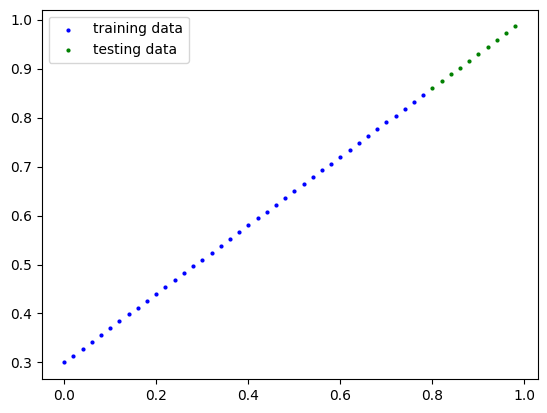

In [ ]:
plot_predictions()

### 2.Building the PyTorch model
    * we start with random values.
      look at our training data and try to get those random values better represent the ideal parameters (weight and bias) that were used to get
      the data.

      Two key algorithms used here:
      1.Gradient Descent
      2.Backpropagation

In [ ]:
# Create linear regression model class

class LinearRegressionModel(nn.Module):  # nn.Module is the base class for all neural network models in pytorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # we are setting a random weight
                                            requires_grad = True,
                                            dtype = float))

    self.bias = nn.Parameter(torch.randn(1, # we are setting a random bias
                                         requires_grad = True,
                                         dtype = float))

  # forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input here
    return self.weights * x + self.bias #linear regression formula

### Pytorch model essential classes
* torch.nn.Parameter - the parameters that our model is going to learn
* torch.nn.Module - base class for all neural networks
* torch.optim - optimisers used in gradient descent
* forward function


In [ ]:
# Lets take a look at the internals of our model
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
# Making predictions

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

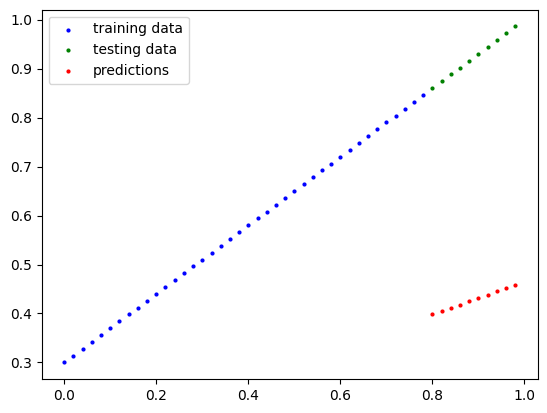

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Training the model
   Move from a poor representation to a better representation of data
  * a `loss` function is used to predict the quality of model predictions, also known as cost function in some cases.
  * Based on the loss of a model, `optimizer` adjusts the model's parameters.
       * In optimizer, we take 2 parameters:
       * `params` and `lr`. lr defines how small/big the optimizer change occurs with each step.


In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01) # lr: learning rate -> the most imp hyperparameter that we can possibly use


### Building a training loop & a testing loop in pyTorch
**Training loop steps**
1. loop through the data
2. Forward propagation
3. calculate the loss: compare fwd pass predictions with ground truth labels.
4. optimizer zero grad
5. loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model wrt to the loss.(*backpropagation*)
6. optimiser step - used to improve the loss by adjusting model parameters(*gradient descent* )


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
torch.manual_seed(42)

epochs = 100   # this is a hyperparameter as we set it ourselves...
epoch_count_values = []
train_loss_values = []
test_loss_values = []

# Training loop
for epoch in range(epochs):
  # Step 1
  model_0.train() # train mode is set

  # Step 2:forward pass on the train data using fwd function inside
  y_pred = model_0(X_train)

  # Step 3
  loss = loss_fn(y_pred, y_train)

  # Step 4
  optimizer.zero_grad()

  # Step 5
  loss.backward()

  # Step 6
  optimizer.step()

  # Testing loop
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batchnorm layers)

  with torch.inference_mode(): # turns off gradient tracking as it is not needed for inference,Used for better performance

    # 1.Forward pass on test data
    test_pred = model_0(X_test)

    # 2.Calculate test loss
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_count_values.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.31288135683755547 | Test loss: 0.4810651841540759
Epoch: 10 | Loss: 0.1976713574739093 | Test loss: 0.346355184508239
Epoch: 20 | Loss: 0.08908721056311557 | Test loss: 0.21729648486064157
Epoch: 30 | Loss: 0.05314849742260115 | Test loss: 0.14464008519991425
Epoch: 40 | Loss: 0.04543793101588776 | Test loss: 0.11360938544629148
Epoch: 50 | Loss: 0.041678606478126046 | Test loss: 0.09919938569279392
Epoch: 60 | Loss: 0.03818929484512264 | Test loss: 0.08886628595826254
Epoch: 70 | Loss: 0.03476085499350197 | Test loss: 0.08059388621223337
Epoch: 80 | Loss: 0.031323806993240874 | Test loss: 0.07232148646620422
Epoch: 90 | Loss: 0.02788736528831538 | Test loss: 0.06473598671634251


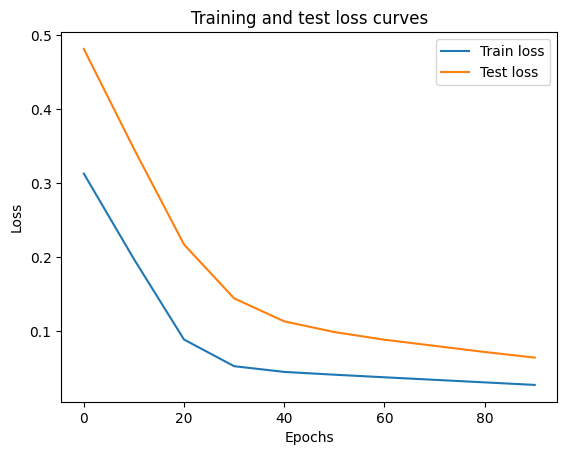

In [ ]:
# Lets plot a loss curve
plt.plot(epoch_count_values, np.array(torch.tensor(train_loss_values).numpy()), label = 'Train loss')
plt.plot(epoch_count_values, np.array(torch.tensor(test_loss_values).numpy()), label = 'Test loss')
plt.title('Training and test loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:
# Making new predictions
with torch.inference_mode():
  y_preds_new = model_0(X_test)

y_preds_new

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]], dtype=torch.float64)

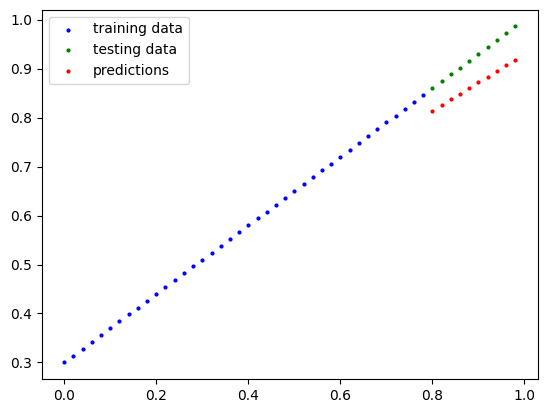

In [ ]:
plot_predictions(predictions = y_preds_new)

### Saving a model in Pytorch


*   `torch.save` - allows us to save the model in Python's pickle format
*   `torch.load` - allows us to load the saved PyTorch object
* `torch.nn.Module.load_state_dict()` - allows us to load a model's saved state dictionary





In [ ]:
from pathlib import Path

# Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Create model save path
MODEL_NAME = "LR_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f= MODEL_SAVE_PATH)

Saving model to: models/LR_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1514 Feb 11 06:25 LR_model_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784], dtype=torch.float64)),
             ('bias', tensor([0.3513], dtype=torch.float64))])

In [ ]:
## Loading the model

# Create a new instance of model class
loaded_model = LinearRegressionModel()

# Load the saved state dict of model_0
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-23-621507033ef0>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.5784], dtype=torch.float64)),
             ('bias', tensor([0.3513], dtype=torch.float64))])

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]], dtype=torch.float64)

In [ ]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])